# Interesting Math Behind PageRank

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Theorem 1: 

Statement: For a square matrix, both the matrix and it's transpose has same eigenvalues.

Why is it interesting?
Because, some people define stochastic matrix as matrix whose rows sum to one, whereas other define it as matrix whose columns sum to one. Stochastic matrices have interesting properties, as we will see. If we know that this theorem is true, we will not need to worry about the definition used within the proof of the remaining theorems. 

Proof: 

For matrix A, it's eigenvalues are solutions of the characteristic polynomial given by $\text{det}(A - \lambda I) = 0$. But, $\text{det}(A) = \text{det}{(A^T)}$. Thus, $\text{det}(A - \lambda I) = \text{det}(A^T - \lambda I)$. Both A and it's transpose have same characteristic polynomial. So same roots. 


## Gershgorin Disks

Statement: 

Let A be `nxn` complex matrix. Let $R_i = \sum_{j \ne i} |A_{ij}|$. Let $D(A_{ii}, R_i)$ be the closed disk centered around diagonal entry $A_{ii}$ with radius $R_i$. Then, if $\lambda$ is an eigenvalue of A, it must lie inside at least one of the disks.


In [121]:


def plot_gershgorin(matrix=None):
    eigvals = np.linalg.eigvals(matrix)

    disk_centers = matrix.diagonal()
    disk_radii = np.abs(matrix).sum(axis=1) - np.abs(disk_centers)


    fig, ax = plt.subplots()
    mx_x = mn_x = mx_y = mn_y = 0
    for cx, r in zip(disk_centers, disk_radii):
        c = plt.Circle((cx, 0), r, alpha=.5)
        mx_x = max(mx_x, cx+r)
        mn_x = min(mn_x, cx-r)
        mx_y = max(mx_y, r)
        mn_y = min(mn_y,-r)
        ax.add_patch(c)
        ax.set_aspect('equal', 'box')
        # break
    ax.hlines(0, mn_x, mx_x, colors='black')
    ax.scatter(eigvals.real, eigvals.imag, marker='x', s=100, c='red')
    ax.set(xlim=(mn_x*1.1, mx_x*1.1), ylim=(mn_y*1.1, mx_y*1.1))
    
    plt.plot()
    
def plot_random_gershgorin(hw, scale, offset):
    matrix = (np.random.rand(hw, hw)*scale-offset).astype(int)
    plot_gershgorin(matrix)
    
def plot_nice_random_gershgorin(hw):
    matrix = np.random.randn(hw, hw)
    matrix += np.diag(np.random.randint(-20, 20, size=hw))
    plot_gershgorin(matrix)

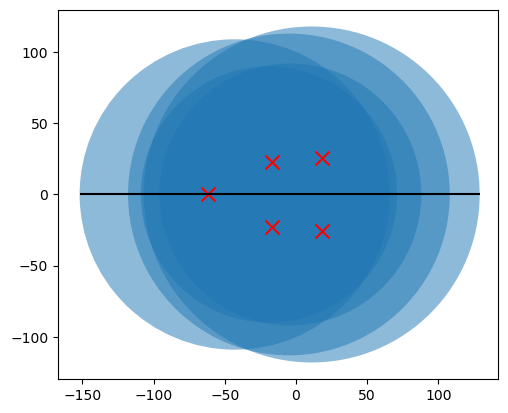

In [122]:
plot_random_gershgorin(5, 100, 50)

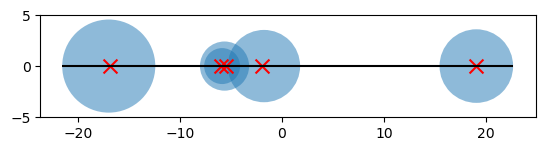

In [123]:
plot_nice_random_gershgorin(5)

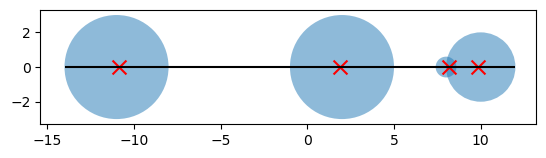

In [124]:
matrix = np.array([[10, -1, 0, 1], [.2, 8, .2, .2], [1, 1, 2, 1], [-1, -1, -1, -11]])

plot_gershgorin(matrix)

### Why is it important?

Because, if you apply this theorem to stochastic matrix (aka Markov matrix), you get bounds on the eigenvalues. 

For this theorem, we will assume to have a row stochastic matrix. Remember, each row sums to one. The Markov matrix has only non-negative real entries. So, for any row i, $\sum_j A_{ij} = 1$. So, each disk has to touch $x = 1$. Now in magnitude, the most any eigenvalue can do is be 1. Did that make sense? Diagram would proably help.

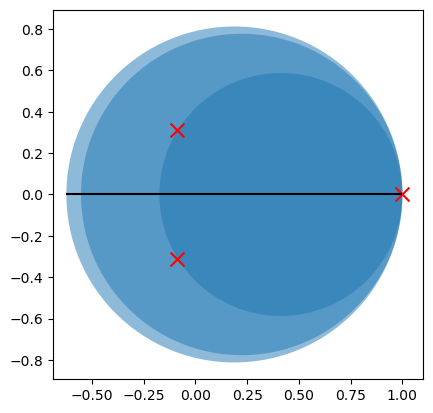

In [134]:
def plot_markov_gershgorin(hw):
    matrix = np.random.rand(hw, hw)
    matrix /= matrix.sum(axis=1)[:, None]
    plot_gershgorin(matrix)

plot_markov_gershgorin(3)

If you run above cell multiple times, you will find that there is always one eigenvalue which is real and is exactly 1. This is not suprising. The reason is, again, that it is a Markov matrix. If you try eigenvector of all ones, the matrix vector multiplication is just the summing over rows, which by definition is one. 

$$
\begin{align*}
\left(\begin{array}{ccc}
.5 & .2 & .3 \\
.1 & .1 & .8 \\
0 & .9 & .1
\end{array}\right) \begin{bmatrix}
1 \\ 
1 \\ 
1 
\end{bmatrix} = \begin{bmatrix}
1 \\ 
1 \\ 
1 
\end{bmatrix}
\end{align*}
$$

### Proof

Proof is easy, and I am getting lazy. So, here is the [link](https://en.wikipedia.org/wiki/Gershgorin_circle_theorem).